# Preprocess


## Mount Google Drive

In [1]:
# Colab 사용시
# from google.colab import drive
# drive.mount('/content/drive')

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import hangul_font
%matplotlib inline

from sklearn.model_selection import train_test_split

Hangul font is set!


/opt/miniconda3/envs/intelli/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Hyper Parameter

In [3]:
# Colab
# DATA_DIR = '/content/drive/MyDrive/miso/intelli/data/'
# SAVE_DIR = '/content/drive/MyDrive/miso/intelli/data/'

# Local
DATA_DIR = '/Users/inseoklee/Desktop/miso/new_intelli/data/'
SAVE_DIR = '/Users/inseoklee/Desktop/miso/new_intelli/data/'

## Load Data

In [4]:
df_relation = pd.read_csv(DATA_DIR + '관계.csv', encoding='cp949')
df_art = pd.read_csv(DATA_DIR + '미술.csv', encoding='cp949')
df_math = pd.read_csv(DATA_DIR + '수리.csv', encoding='cp949')
df_body = pd.read_csv(DATA_DIR + '신체.csv', encoding='cp949')
df_language = pd.read_csv(DATA_DIR + '언어.csv', encoding='cp949')
df_music = pd.read_csv(DATA_DIR + '음악.csv', encoding='cp949')
df_nature = pd.read_csv(DATA_DIR + '자연.csv', encoding='cp949')

In [5]:
df = pd.concat([df_relation, df_art, df_math, df_body, df_language, df_music, df_nature])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400336 entries, 0 to 130594
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   답변      185882 non-null  object
 1   지능      185882 non-null  object
dtypes: object(2)
memory usage: 9.2+ MB


In [6]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400336 entries, 0 to 400335
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   답변      185882 non-null  object
 1   지능      185882 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB


In [7]:
df[:]

,답변,지능
0,친구들이랑 노는게 좋아,관계
1,가족들이랑 같이 노는게 좋아,관계
2,친구들이랑 사이 좋게지내는게 좋아,관계
3,친구들이랑 재밌게 노는게 좋아,관계
4,얘들이랑 사이좋게 노는게 좋아,관계
...,...,...
400331,NaN,NaN
400332,NaN,NaN
400333,NaN,NaN
400334,NaN,NaN


### Drop NaN (결측치 제거)

In [8]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185882 entries, 0 to 296273
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   답변      185882 non-null  object
 1   지능      185882 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB


In [9]:
df[:]

,답변,지능
0,친구들이랑 노는게 좋아,관계
1,가족들이랑 같이 노는게 좋아,관계
2,친구들이랑 사이 좋게지내는게 좋아,관계
3,친구들이랑 재밌게 노는게 좋아,관계
4,얘들이랑 사이좋게 노는게 좋아,관계
...,...,...
296269,나는 제인 구달처럼 될 거예요,자연
296270,나는 멘델처럼 되고 싶어요,자연
296271,나는 멘델처럼 될 거예요,자연
296272,나는 콘라트 로렌츠처럼 되고 싶어요,자연


In [10]:
df['답변'].nunique()

139041

답변 컬럼에 중복된 데이터가 존재하는듯 하다

In [11]:
df['지능'].nunique()

7

In [12]:
df['지능'].unique()

array(['관계', '미술', '수리', '신체', '언어', '음악', '자연'], dtype=object)

지능 컬럼엔 문제가 없다

중복 데이터 확인

In [13]:
# 46,704 개의 중복데이터 존재

dup = df.duplicated()
dup.sum()

46704

In [14]:
df.drop_duplicates(subset=['답변'], inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139041 entries, 0 to 139040
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   답변      139041 non-null  object
 1   지능      139041 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


font

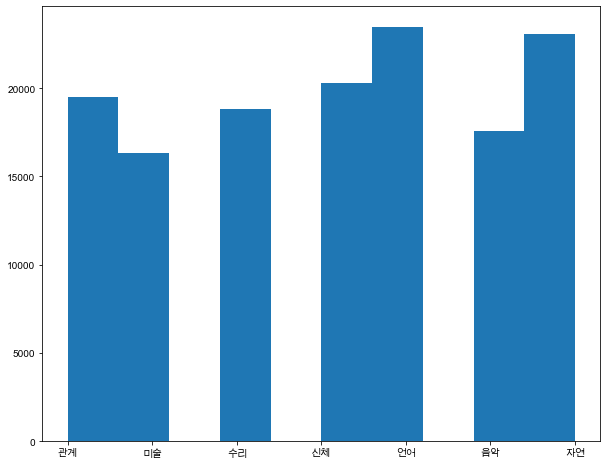

In [15]:
label = df['지능']

plt.figure(figsize=(10, 8))
plt.hist(label)
plt.show()

In [16]:
label.value_counts()

언어    23463
자연    23051
신체    20302
관계    19517
수리    18807
음악    17564
미술    16337
Name: 지능, dtype: int64

## Save

In [17]:
 df.to_csv(SAVE_DIR + 'new_intelli.csv', encoding='utf-8-sig', index=False)